In [1]:
# imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns

from warnings import filterwarnings

In [2]:
# read csv

nyc_df = pd.read_csv("./Data/NYC_Tickets_2017.csv")

nyc_df.head(15)

,Plate_Type,Issue Date,Violation_Code,Vehicle_Body_Type,Vehicle Make,Issuing Agency,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Violation_Time,Violation_County,Street Name,Law Section,Sub Division,Vehicle_Color,Vehicle_Year,Violation Description
0,PAS,7/10/2016,7,SUBN,TOYOT,V,NaN,0,0,0,NaN,0143A,BX,ALLERTON AVE (W/B) @,1111,D,GY,2001,FAILURE TO STOP AT RED LIGHT
1,PAS,7/8/2016,7,SUBN,TOYOT,V,NaN,0,0,0,NaN,0400P,BX,ALLERTON AVE (W/B) @,1111,D,GY,2001,FAILURE TO STOP AT RED LIGHT
2,PAS,8/23/2016,5,SUBN,FORD,V,NaN,0,0,0,NaN,0233P,BX,SB WEBSTER AVE @ E 1,1111,C,BK,2004,BUS LANE VIOLATION
3,COM,6/14/2017,47,REFG,MITSU,T,14.0,14,14,359594,T102,1120A,NY,7th Ave,408,l2,WH,2007,47-Double PKG-Midtown
4,COM,11/21/2016,69,DELV,INTER,T,13.0,13,13,364832,T102,0555P,NY,6th Ave,408,h1,WHITE,2007,69-Failure to Disp Muni Recpt
5,PAS,6/13/2017,7,SUBN,ME/BE,V,NaN,0,0,0,NaN,0852P,QN,NORTHERN BLVD (E/B),1111,D,WH,2012,FAILURE TO STOP AT RED LIGHT
6,PAS,8/3/2016,40,SDN,TOYOT,P,71.0,71,71,960290,71,0215A,K,KINGSTON,408,C3,WHITE,0,NaN
7,PAS,12/21/2016,36,UT,BMW,V,NaN,0,0,0,NaN,0758A,BX,EB E GUN HILL RD @ B,1180,B,NaN,2001,PHTO SCHOOL ZN SPEED VIOLATION
8,OMS,11/21/2016,36,SUBN,DODGE,V,NaN,0,0,0,NaN,1005A,QN,NB BAISLEY BLVD @ 15,1180,B,BK,2016,PHTO SCHOOL ZN SPEED VIOLATION
9,PAS,10/5/2016,5,4D,BMW,V,NaN,0,0,0,NaN,0845A,BX,SB WEBSTER AVE @ E 2,1111,C,BLK,2008,BUS LANE VIOLATION


In [3]:
# looking at columns

nyc_df.columns

Index(['Plate_Type', 'Issue Date', 'Violation_Code', 'Vehicle_Body_Type',
       'Vehicle Make', 'Issuing Agency', 'Violation Location',
       'Violation Precinct', 'Issuer Precinct', 'Issuer Code',
       'Issuer Command', 'Violation_Time', 'Violation_County', 'Street Name',
       'Law Section', 'Sub Division', 'Vehicle_Color', 'Vehicle_Year',
       'Violation Description'],
      dtype='object')

In [4]:
# keeping columns needed for analysis

nyc_df = pd.DataFrame(nyc_df, columns = 
     ['Plate_Type', 'Violation_Code', 'Vehicle_Body_Type','Violation_Time', 'Violation_County',
     'Vehicle_Color', 'Vehicle_Year'])

In [5]:
nyc_df.head(10)

,Plate_Type,Violation_Code,Vehicle_Body_Type,Violation_Time,Violation_County,Vehicle_Color,Vehicle_Year
0,PAS,7,SUBN,0143A,BX,GY,2001
1,PAS,7,SUBN,0400P,BX,GY,2001
2,PAS,5,SUBN,0233P,BX,BK,2004
3,COM,47,REFG,1120A,NY,WH,2007
4,COM,69,DELV,0555P,NY,WHITE,2007
5,PAS,7,SUBN,0852P,QN,WH,2012
6,PAS,40,SDN,0215A,K,WHITE,0
7,PAS,36,UT,0758A,BX,NaN,2001
8,OMS,36,SUBN,1005A,QN,BK,2016
9,PAS,5,4D,0845A,BX,BLK,2008


In [6]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   Plate_Type         1048575 non-null  object
 1   Violation_Code     1048575 non-null  int64 
 2   Vehicle_Body_Type  1044581 non-null  object
 3   Violation_Time     1048570 non-null  object
 4   Violation_County   1044887 non-null  object
 5   Vehicle_Color      1034585 non-null  object
 6   Vehicle_Year       1048575 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 56.0+ MB


total number of enetries = 1,048,575

In [7]:
 nyc_df.dtypes

Plate_Type           object
Violation_Code        int64
Vehicle_Body_Type    object
Violation_Time       object
Violation_County     object
Vehicle_Color        object
Vehicle_Year          int64
dtype: object

Violation_code and Violation_Year are integers. The rest are strings. Violation_Time is in string, which could be prblmeatic later on in analysis.

In [8]:
# different plate types

nyc_df['Plate_Type'].value_counts()

PAS    776315
COM    178697
OMT     43400
OMS     10554
SRF      8617
        ...  
HIR         1
BOT         1
LMC         1
USS         1
FPW         1
Name: Plate_Type, Length: 75, dtype: int64

Passenger vehicles are the most getting the violations. Commerical is second, but these vehicles are mostly used for business. Passenger vehicles would represent the common public.

In [9]:
# looking at violation codes

nyc_df['Violation_Code'].value_counts()

# Kept 14, 20, 21, 36, 38

# 14 -	General No Standing: Standing or parking where standing is not allowed by sign, street marking or; traffic control device.
# 20 - 	General No Parking: No parking where parking is not allowed by sign, street marking or traffic control device.
# 21 - Street Cleaning: No parking where parking is not allowed by sign, street marking or traffic control device.
# 36 - Exceeding the posted speed limit in or near a designated school zone.
# 38 -Failing to show a receipt or tag in the windshield.

21    149217
36    134108
38    104847
14     87812
20     60748
       ...  
32         3
34         2
76         2
28         2
44         1
Name: Violation_Code, Length: 96, dtype: int64

In [10]:
# vehicle_body_type counts

nyc_df['Vehicle_Body_Type'].value_counts()


# Kept these types in filtered data : 2 DSD (two door sedan), 4 DSD (four door sedan), PICK (pickup), SUBN (suburben)

SUBN    361645
4DSD    300389
VAN     137456
DELV     66890
SDN      41649
         ...  
MCB          1
4RUN         1
4WD          1
DEMI         1
TOWL         1
Name: Vehicle_Body_Type, Length: 525, dtype: int64

Most popular cars were suburbans and 4 door sedans. These are probably the most sold to the public. Van and delivery cars were 3rd and 4th most common for violation, but these types of vehicles are mostly used for commercial (business) purposes. 

In [11]:
# looking at different counties 

nyc_df['Violation_County'].value_counts()

NY    335925
K     216855
Q     180564
BX    131950
BK     82284
QN     63607
ST     13043
R      11928
MN      8731
Name: Violation_County, dtype: int64

New York, Kings County, Queens, Bronx, and Brooklyn are the most popular counties for violations. 

In [12]:
# looking at car colors 

nyc_df['Vehicle_Color'].value_counts().head(50)

## Colors kept:
## WH, WHITE, GY, GREY, BK, BLACK, BL, SILVE, BLUE, RED, RD, GR, GREEN,YW, YELLO, ORANG, PURPL

GY       169022
WH       164184
BK       146432
WHITE    122620
BLACK     62214
BL        57968
RD        37477
GREY      36739
SILVE     27061
BROWN     26117
BLUE      24525
RED       22243
GR        19639
TN        13002
OTHER     10614
GREEN     10427
YW         8594
BR         8471
BLK        7846
GRAY       6617
GL         5668
TAN        4249
YELLO      4210
GOLD       3725
GRY        3669
MR         3495
WHT        2555
WT         2315
OR         1575
ORANG      1454
WHI        1398
LTG        1194
SIL        1073
SL         1071
BLU        1013
BRN         918
DK/         912
LT/         874
LTGY        617
PR          600
PURPL       562
DKG         550
GRN         512
DKGY        319
GN          296
DKB         237
GYGY        231
BEIGE       211
BN          207
BLW         203
Name: Vehicle_Color, dtype: int64

Most popular colors were gray, white, and black. This could skew data.

In [13]:
# Looing at vehicle year

nyc_df['Vehicle_Year'].value_counts().head(50)

0       227368
2015    104347
2016     99816
2014     69443
2013     59127
2012     46906
2007     44783
2011     40599
2006     39744
2008     38630
2005     36478
2004     33848
2010     32998
2009     31080
2017     29362
2003     27770
2002     22501
2001     18954
1999     11097
1998      8453
1997      7286
1996      4085
1995      3434
1994      1500
1990      1357
1992      1342
1993      1286
1988      1192
1989       850
1991       661
1986       543
1987       526
2018       213
1985       191
1984       123
1983        72
1982        57
1979        47
1978        43
1980        39
1981        38
1977        35
1973        28
1971        27
2019        25
1975        23
2066        21
1972        21
2068        21
1976        21
Name: Vehicle_Year, dtype: int64

A lot of 0 values. This could give us some poor results. The most popular car year for violations was 2015.

In [14]:
# looking at violation times

nyc_df['Violation_Time'].value_counts().head(10)

1140A    2682
0836A    2675
1136A    2565
0906A    2467
0840A    2456
0936A    2425
1145A    2395
1142A    2382
0940A    2378
0945A    2353
Name: Violation_Time, dtype: int64

Most tickets are in the morning, between the hours of 8:30 AM to 11:45 AM. The data is also in string form. This could cause some issues.

Next, I took most popular value types and filtered it out in excel. I uploaded the filtered excel sheet and continued the analysis.

In [15]:
# upload filtered dataset

nyc_filtered = pd.read_csv("./Data/NYC_Tickets_Filtered.csv")

nyc_filtered.head(5)

C:\Users\loren\anaconda3\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (0,2,3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Plate_Type,Violation_Code,Vehicle_Body_Type,Vehicle_Color,Vehicle_Year,Violation_County,Violation_Time
0,PAS,21.0,SUBN,SILVE,2008,K,0950A
1,PAS,38.0,SUBN,WH,2014,NY,0817A
2,PAS,21.0,4DSD,RED,0,K,0820A
3,PAS,36.0,4DSD,GY,2011,QN,1047A
4,PAS,14.0,4DSD,WHITE,0,NY,1031A


In [16]:
nyc_filtered.info()

# checking for nulls
nyc_filtered.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Plate_Type         312025 non-null   object 
 1   Violation_Code     312025 non-null   float64
 2   Vehicle_Body_Type  312025 non-null   object 
 3   Vehicle_Color      312025 non-null   object 
 4   Vehicle_Year       1048575 non-null  object 
 5   Violation_County   1048386 non-null  object 
 6   Violation_Time     1048572 non-null  object 
dtypes: float64(1), object(6)
memory usage: 56.0+ MB


Plate_Type           736550
Violation_Code       736550
Vehicle_Body_Type    736550
Vehicle_Color        736550
Vehicle_Year              0
Violation_County        189
Violation_Time            3
dtype: int64

In three rows there are 709,815 na ammounts. Having to remove this data could produce poor results in our model. 

In [17]:
#dropping nulls
nyc_drop = nyc_filtered.dropna()
nyc_drop.info()
nyc_drop.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311836 entries, 0 to 312024
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Plate_Type         311836 non-null  object 
 1   Violation_Code     311836 non-null  float64
 2   Vehicle_Body_Type  311836 non-null  object 
 3   Vehicle_Color      311836 non-null  object 
 4   Vehicle_Year       311836 non-null  object 
 5   Violation_County   311836 non-null  object 
 6   Violation_Time     311836 non-null  object 
dtypes: float64(1), object(6)
memory usage: 19.0+ MB


,Plate_Type,Violation_Code,Vehicle_Body_Type,Vehicle_Color,Vehicle_Year,Violation_County,Violation_Time
0,PAS,21.0,SUBN,SILVE,2008,K,0950A
1,PAS,38.0,SUBN,WH,2014,NY,0817A
2,PAS,21.0,4DSD,RED,0,K,0820A
3,PAS,36.0,4DSD,GY,2011,QN,1047A
4,PAS,14.0,4DSD,WHITE,0,NY,1031A
5,PAS,36.0,SUBN,BL,2011,QN,0952A
6,PAS,20.0,SUBN,BK,2016,NY,0921A
7,PAS,20.0,SUBN,BK,2010,BX,0255A
8,PAS,38.0,4DSD,GY,2015,NY,0936P
9,PAS,38.0,SUBN,GY,2005,K,0958A


Now the data has reduced to having 338,523 entries

In [18]:
# Fix Colors 
def change_color(color):
  if color == 'GY':
    return 'GREY'
  elif color == 'BK':
    return 'BLACK'
  elif color == 'BLAK':
    return 'BLACK'
  elif color == 'WH':
    return 'WHITE'
  elif color == 'BL':
    return 'BLUE'
  elif color == 'RD':
    return 'RED'
  elif color == 'SILVE':
    return 'SILVER'
  elif color == 'GR':
    return 'GREEN'
  elif color == 'YW':
    return 'YELLOW'
  elif color == 'YELLO':
    return 'YELLOW'
  elif color == 'ORANG':
    return 'ORANGE'
  elif color == 'PURPL':
    return 'PURPLE'
  else: return color;
    
nyc_drop['Vehicle_Color']= nyc_drop['Vehicle_Color'].apply(change_color)
nyc_drop

C:\Users\loren\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Plate_Type,Violation_Code,Vehicle_Body_Type,Vehicle_Color,Vehicle_Year,Violation_County,Violation_Time
0,PAS,21.0,SUBN,SILVER,2008,K,0950A
1,PAS,38.0,SUBN,WHITE,2014,NY,0817A
2,PAS,21.0,4DSD,RED,0,K,0820A
3,PAS,36.0,4DSD,GREY,2011,QN,1047A
4,PAS,14.0,4DSD,WHITE,0,NY,1031A
...,...,...,...,...,...,...,...
312020,PAS,14.0,4DSD,BLACK,2011,NY,0412P
312021,PAS,21.0,SUBN,GREEN,2004,Q,1201P
312022,PAS,36.0,4DSD,RED,2003,QN,0200P
312023,PAS,38.0,4DSD,BLUE,2015,K,0202P


In [19]:
# drop Vehicle_Year rows with 0's
nyc_drop= nyc_drop[nyc_drop.Vehicle_Year != 0]
nyc_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267967 entries, 0 to 312024
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Plate_Type         267967 non-null  object 
 1   Violation_Code     267967 non-null  float64
 2   Vehicle_Body_Type  267967 non-null  object 
 3   Vehicle_Color      267967 non-null  object 
 4   Vehicle_Year       267967 non-null  object 
 5   Violation_County   267967 non-null  object 
 6   Violation_Time     267967 non-null  object 
dtypes: float64(1), object(6)
memory usage: 16.4+ MB


In [59]:
nyc_drop['Vehicle_Body_Type'].value_counts()

SUBN    138808
4DSD    110410
2DSD      9922
PICK      8827
Name: Vehicle_Body_Type, dtype: int64

In [60]:
nyc_df['Vehicle_Year'].value_counts().head(10)

1140A    2682
0836A    2675
1136A    2565
0906A    2467
0840A    2456
0936A    2425
1145A    2395
1142A    2382
0940A    2378
0945A    2353
Name: Violation_Time, dtype: int64

In [20]:
# upload dropped na dataframe to csv
#nyc_drop.to_csv('dropped_na_nyc_filtered.csv', index = False)

C:\Users\loren\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


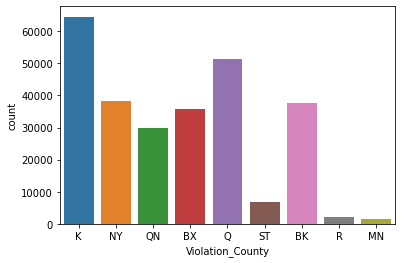

In [22]:
sns.countplot(nyc_drop['Violation_County']);

C:\Users\loren\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


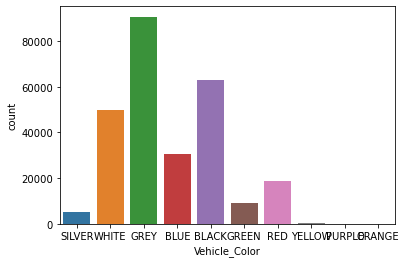

In [36]:
sns.countplot(nyc_drop['Vehicle_Color']);

C:\Users\loren\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


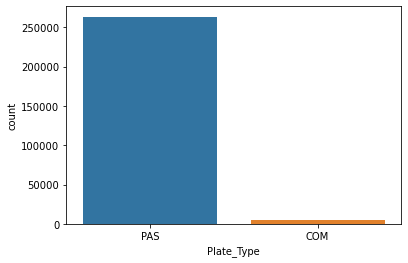

In [58]:
sns.countplot(nyc_drop['Plate_Type']);



<AxesSubplot:>

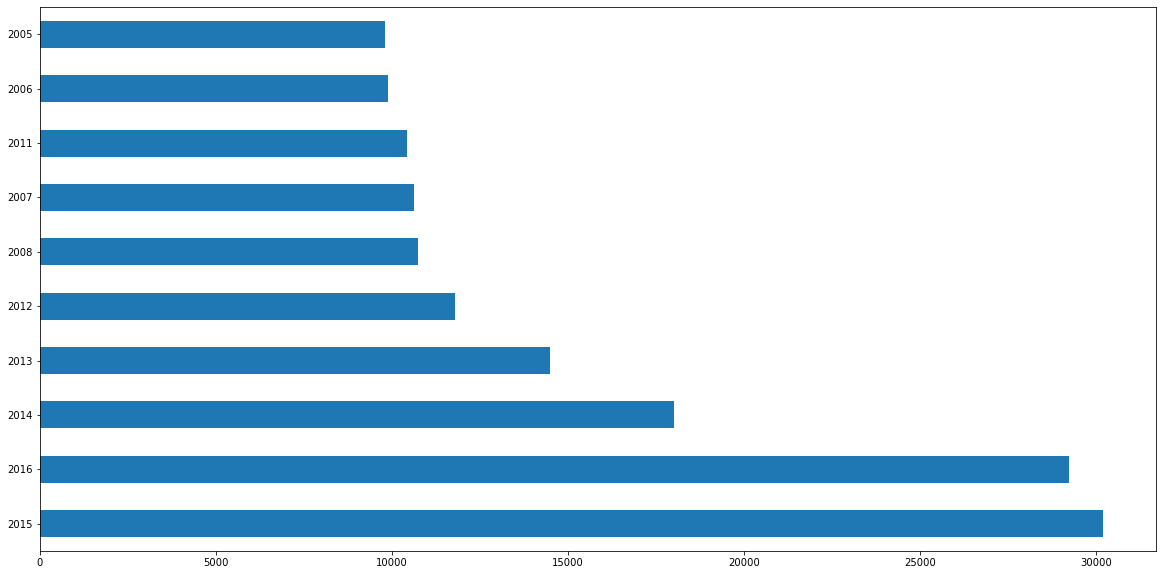

In [56]:
year = pd.DataFrame(nyc_drop, columns = 
     ['Vehicle_Year'])


#sns.countplot(time['Violation_Time']);

year['Vehicle_Year'].value_counts().head(10).plot(kind='barh', figsize=(20,10))

C:\Users\loren\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


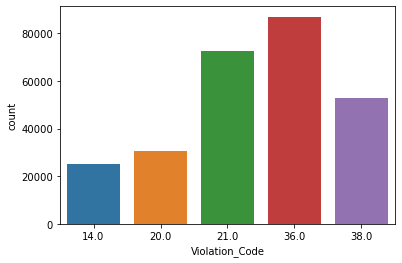

In [24]:
sns.countplot(nyc_drop['Violation_Code']);

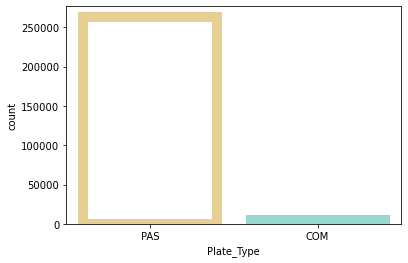

In [49]:
# class v / s fare barplot
sns.countplot(x ='Plate_Type', data = nyc_drop,color="salmon", facecolor=(0, 0, 0, 0),
                   linewidth=10,
                   edgecolor=sns.color_palette("BrBG", 2))
# Show the plot
plt.show()

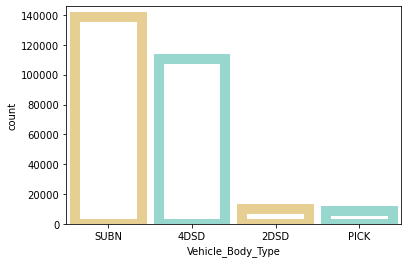

In [47]:


# class v / s fare barplot
sns.countplot(x ='Vehicle_Body_Type', data = nyc_drop,color="salmon", facecolor=(0, 0, 0, 0),
                   linewidth=10,
                   edgecolor=sns.color_palette("BrBG", 2))
# Show the plot
plt.show()